In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
def project(V, x):
    dot1 = np.dot(V[0], x)
    dot2 = np.dot(V[1], x)
    return dot1, dot2

In [ ]:
def ReLU(x):
    return x * (x > 0)

def one(x):
    return 1 * (x > 0)

In [ ]:
x = np.random.permutation(np.arange(-20, 20, 0.01))
y = np.random.permutation(np.arange(-20, 20, 0.01))
z = np.random.permutation(np.arange(-20, 20, 0.01))

u = -0.5*x - 0.5*y
v = -0.5*x - 0.5*y
w = 2*z

data = [{
    "type": "cone",
    "x": x,
    "y": y,
    "z": z,
    "u": u,
    "v": v,
    "w": w,
    "colorscale": 'Blues',
    "sizemode": "absolute",
    "sizeref": 50
}]

layout = {
    "scene": {
        "aspectratio": {"x": 1, "y": 1, "z": 0.8},
        "camera": {
            "eye": {"x": 1.2, "y": 1.2, "z": 0.6}
        },
    'xaxis_title': 'x1',
    'yaxis_title': 'x2',
    'zaxis_title': 'x3'
    }
}

fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
x, y = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1))

u = -0.5*x - 0.5*y
v = -0.5*x - 0.5*y
w = 2*y

In [ ]:
fig = ff.create_quiver(x, y, u, w)
fig['layout'].update(xaxis_title='x1', yaxis_title='x3')
fig.show()

In [ ]:
e1 = (1/np.sqrt(2))*np.array([1, -1, 0])
e2 = np.array([0, 0, 1])
V = [e1, e2]

In [ ]:
x = np.arange(-1, 1, 0.05)
y = np.arange(-1, 1, 0.05)

u = -0.5*x - 0.5*y
v = -0.5*x - 0.5*y

xp = []
yp = []

up = []
vp = []

for i in range(len(x)):
    for j in range(len(y)):
        xd, yd = project(V, [x[i], y[j], 0])
        ud, vd = project(V, [u[i], v[j], 0])
        xp.append(xd)
        yp.append(yd)
        up.append(ud)
        vp.append(vd)

In [ ]:
fig = ff.create_quiver(xp, yp, up, vp)
fig['layout'].update(xaxis_title='x1', yaxis_title='x3')
fig.show()

In [ ]:
# Question 2.2
x, y = np.meshgrid(np.arange(-5, 5, 0.5), np.arange(-5, 5, 0.5))
s1 = s2 = 1
c = 2

du1 = -x -c*ReLU(y) + s1
du2 = -y -c*ReLU(x) + s2

In [ ]:
fig = ff.create_quiver(x, y, du1, du2, name='Dynamics')
fig['layout'].update(xaxis_title='u1', yaxis_title='u2')
fig.add_trace(go.Scatter(x=[1/3, 1/3], y=[1/3,1/3],
                    mode='markers',
                    marker_size=10,
                    name='Saddle point'))
fig.add_trace(go.Scatter(x=[1, -1], y=[-1, 1],
                    mode='markers',
                    marker_size=10,
                    name='Attractors'))
fig.show()

In [ ]:
# Question 2.5
x, y = np.meshgrid(np.arange(-5, 5, 0.5), np.arange(-5, 5, 0.5))
s1 = 1
s2 = 1.2
c = 2

du1 = -x -c*ReLU(y) + s1
du2 = -y -c*ReLU(x) + s2

xt = 0
yt = 0
u0t = []
v0t = []
for t in range(1, 10000):
    xt = xt + 0.001*(-xt -c*ReLU(yt) + s1)
    yt = yt + 0.001*(-yt -c*ReLU(xt) + s2)
    
    u0t.append(xt)
    v0t.append(yt)
    
xt1 = -1
yt1 = 1
u1t = []
v1t = []
for t in range(1, 10000):
    xt1 = xt1 + 0.001*(-xt1 -c*ReLU(yt1) + s1)
    yt1 = yt1 + 0.001*(-yt1 -c*ReLU(xt1) + s2)
    
    u1t.append(xt1)
    v1t.append(yt1)
    
xt2 = 1
yt2 = -1
u2t = []
v2t = []
for t in range(1, 10000):
    xt2 = xt2 + 0.001*(-xt2 -c*ReLU(yt2) + s1)
    yt2 = yt2 + 0.001*(-yt2 -c*ReLU(xt2) + s2)
    
    u2t.append(xt2)
    v2t.append(yt2)

In [ ]:
fig = ff.create_quiver(x, y, du1, du2, name='Dynamics')
fig['layout'].update(xaxis_title='u1', yaxis_title='u2')
fig.add_trace(go.Scatter(x=[0.467,0.467], y=[0.267, 0.267],
                    mode='markers',
                    marker_size=10,
                    name='Saddle point'))
fig.add_trace(go.Scatter(x=[-1.4, 1], y=[1.2, -0.8],
                    mode='markers',
                    marker_size=10,
                    name='Attractors'))
fig.add_trace(go.Scatter(x=u0t, y=v0t,
                    marker=dict(
                        size=2,
                        autocolorscale=True),
                    name='u0 = (0, 0)'))
fig.add_trace(go.Scatter(x=u1t, y=v1t,
                    marker=dict(
                        size=2,
                        autocolorscale=True),
                    name='u0 = (-1, 1)'))
fig.add_trace(go.Scatter(x=u2t, y=v2t,
                    marker=dict(
                        size=2,
                        autocolorscale=True),
                    name='u0 = (1, -1)'))
fig.show()

In [ ]:
# Question 2.6
x, y = np.meshgrid(np.arange(-5, 5, 0.6), np.arange(-5, 5, 0.6))
s1 = 1
s2 = 1
c = -2

du1 = -x -c*ReLU(y) + s1
du2 = -y -c*ReLU(x) + s2

xt = 0
yt = 0
u0t = []
v0t = []
for t in range(1, 1600):
    xt = xt + 0.001*(-xt -c*ReLU(yt) + s1)
    yt = yt + 0.001*(-yt -c*ReLU(xt) + s2)
    
    u0t.append(xt)
    v0t.append(yt)
    
xt1 = -1
yt1 = 1
u1t = []
v1t = []
for t in range(1, 1600):
    xt1 = xt1 + 0.001*(-xt1 -c*ReLU(yt1) + s1)
    yt1 = yt1 + 0.001*(-yt1 -c*ReLU(xt1) + s2)
    
    u1t.append(xt1)
    v1t.append(yt1)
    
xt2 = 1
yt2 = -1
u2t = []
v2t = []
for t in range(1, 1600):
    xt2 = xt2 + 0.001*(-xt2 -c*ReLU(yt2) + s1)
    yt2 = yt2 + 0.001*(-yt2 -c*ReLU(xt2) + s2)
    
    u2t.append(xt2)
    v2t.append(yt2)


In [ ]:
fig = ff.create_quiver(x, y, du1, du2, name='Dynamics')
fig['layout'].update(xaxis_title='u1', yaxis_title='u2')
fig.add_trace(go.Scatter(x=u0t, y=v0t,
                    marker=dict(
                        size=2,
                        autocolorscale=True),
                    name='u0 = (0, 0)'))
fig.add_trace(go.Scatter(x=u1t, y=v1t,
                    marker=dict(
                        size=2,
                        autocolorscale=True),
                    name='u0 = (-1, 1)'))
fig.add_trace(go.Scatter(x=u2t, y=v2t,
                    marker=dict(
                        size=2,
                        autocolorscale=True),
                    name='u0 = (1, -1)'))
fig.show()

In [ ]:
# Question 2.7
x, y = np.meshgrid(np.arange(-3, 5, 0.5), np.arange(-3, 5, 0.5))
s1 = s2 = 1
c = -2

du1 = -x -c*one(y) + s1
du2 = -y -c*one(x) + s2

xt = 0
yt = 0
u0t = []
v0t = []
for t in range(1, 2000):
    xt = xt + 0.01*(-xt -c*one(yt) + s1)
    yt = yt + 0.01*(-yt -c*one(xt) + s2)
    
    u0t.append(xt)
    v0t.append(yt)
    
xt1 = -1
yt1 = 1
u1t = []
v1t = []
for t in range(1, 2000):
    xt1 = xt1 + 0.01*(-xt1 -c*one(yt1) + s1)
    yt1 = yt1 + 0.01*(-yt1 -c*one(xt1) + s2)
    
    u1t.append(xt1)
    v1t.append(yt1)
    
xt2 = 1
yt2 = -1
u2t = []
v2t = []
for t in range(1, 2000):
    xt2 = xt2 + 0.01*(-xt2 -c*one(yt2) + s1)
    yt2 = yt2 + 0.01*(-yt2 -c*one(xt2) + s2)
    
    u2t.append(xt2)
    v2t.append(yt2)

In [ ]:
fig = ff.create_quiver(x, y, du1, du2, name='Dynamics')
fig['layout'].update(xaxis_title='u1', yaxis_title='u2')
fig.add_trace(go.Scatter(x=[3, 3], y=[3, 3],
                    mode='markers',
                    marker_size=10,
                    name='Attractor'))
fig.add_trace(go.Scatter(x=u0t, y=v0t,
                    marker=dict(
                        size=2,
                        autocolorscale=True),
                    name='u0 = (0, 0)'))
fig.add_trace(go.Scatter(x=u1t, y=v1t,
                    marker=dict(
                        size=2,
                        autocolorscale=True),
                    name='u0 = (-1, 1)'))
fig.add_trace(go.Scatter(x=u2t, y=v2t,
                    marker=dict(
                        size=2,
                        autocolorscale=True),
                    name='u0 = (1, -1)'))
fig.show()

In [313]:
u1, u2 = np.meshgrid(np.arange(0, 2, 0.05), np.arange(0, 2, 0.05))

tau = 1
s1 = 1
s2 = 1

du1 = -u1/tau + s1/((1 + u2)*tau)
du2 = -u2/tau + s2/((1 + u1)*tau)

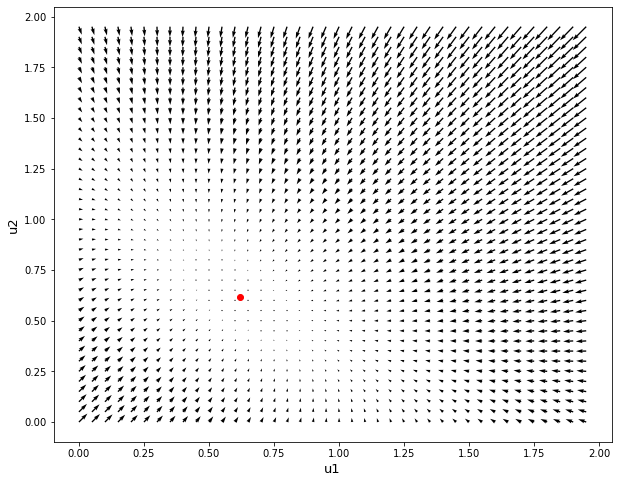

In [315]:
# fig = ff.create_quiver(du1, du2, u1, u2)
# fig['layout'].update(xaxis_title='u1', yaxis_title='u2')
# fig.show()
plt.figure(figsize=(10, 8))
plt.quiver(u1, u2, du1, du2)
plt.xlabel('u1', fontsize=13)
plt.ylabel('u2', fontsize=13)
plt.scatter(fx_x, fx_y, c='r', label='Stationary point')
plt.savefig('fig3.png')
# plt.xlim(-2, 2)
# plt.ylim(-2, 2)

In [314]:
s1 = 1
s2 = 1

u11 = s1/(1+np.arange(0, 2, 0.05))
u21 = s2/(1+u1)

u22 = s2/(1+np.arange(0, 2, 0.05))
u21 = s1/(1+u22)

fx_x = (-1 + np.sqrt(1 + 4*s1))/2
fx_y = (2*s2)/(1 + np.sqrt(1 + 4*s1))

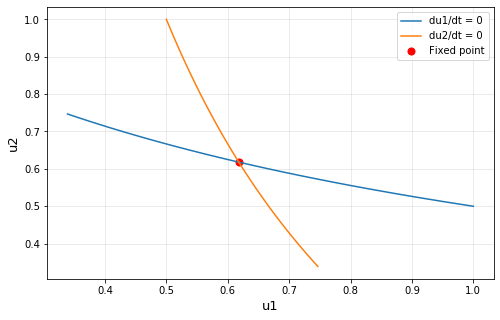

In [278]:
fig = plt.figure(figsize=(8, 5))
plt.plot(u11, u21, label='du1/dt = 0')
plt.plot(u21, u22, label='du2/dt = 0')
plt.scatter(fx_x, fx_y, c='r', marker='o', s=50, alpha=1, label='Fixed point')
plt.xlabel('u1', fontsize=13)
plt.ylabel('u2', fontsize=13)
plt.grid(alpha=0.3)
plt.legend()
# plt.xlim(0, 10)
# plt.ylim(0, 10)
# plt.savefig('fig2.png')

In [318]:
(-2 - np.sqrt(3-3/4))/2

-1.75